In [1]:
#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd
import gc
import pickle

In [8]:
data1 = dg.load_data('Q2_mucols2_nue.txt', n_events = 1e5, direc = 'GENANA', getQ = True) #this is my variable for the directory in which my .txt files are.
data2 = dg.load_data('Q2_mucols2_numu.txt', n_events = 1e5, direc = 'GENANA', getQ = True)
data = pd.concat([data1, data2], axis = 0)

Loading generated data for a IMCC-II experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!
Loading generated data for a IMCC-II experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Computing Q2...
Done!


In [9]:
data.head()

,DComp,nu_E,IncL,OutL,E,px,py,pz,w,Q2
0,MD,1938.820,12,11,975.2880,-8.784670,-3.69473,975.2410,246500.0,90.574217
1,MD,2467.400,12,11,1725.0800,-8.977650,-2.94480,1725.0500,246500.0,44.540100
2,MD,3904.030,12,12,71.8763,-0.506579,2.26986,71.8387,246500.0,288.179372
3,MD,1214.800,12,12,815.4970,-7.864920,-1.19387,815.4580,246500.0,31.147155
4,MD,886.532,12,11,503.6400,6.522990,-4.10951,503.5810,246500.0,45.184737


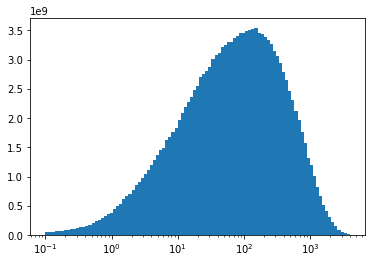

In [16]:
bins = np.logspace(-1, 3.6, 100)
plt.hist(data['Q2'], weights = data['w'], bins = bins)
plt.xscale('log')
plt.show()

In [2]:
data1 = dg.load_data('mucols2numu.txt', n_events = 1e5, direc = 'GENANA') #this is my variable for the directory in which my .txt files are.
data2 = dg.load_data('mucols2nue.txt', n_events = 1e5, direc = 'GENANA')
data = pd.concat([data1, data2], axis = 0)

Loading generated data for a MuCoL (s2) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!
Loading generated data for a MuCoL (s2) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!


In [3]:
data11 = dg.load_data('mokhovnumu.txt', n_events = 1e5, direc = 'GENANA') #this is my variable for the directory in which my .txt files are.
data21 = dg.load_data('mokhovnue.txt', n_events = 1e5, direc = 'GENANA')
datam = pd.concat([data11, data21], axis = 0)

Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!


In [4]:
datat = dg.load_data('muTs.txt', n_events = 1e5, direc = 'GENANA') 

Loading generated data for a μTRISTAN (s) experiment;
It includes interactions from ν_e, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.
Adding weights...
Done!


In [5]:
mus_mucol = (data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')])
es_mucol = (data[(data['Name'] == 'e-') | (data['Name'] == 'e+')])

mus_mokhov = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])
es_mokhov = (datam[(datam['Name'] == 'e-') | (datam['Name'] == 'e+')])

mus_muT = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])
es_muT = (datat[(datat['Name'] == 'e-') | (datat['Name'] == 'e+')])

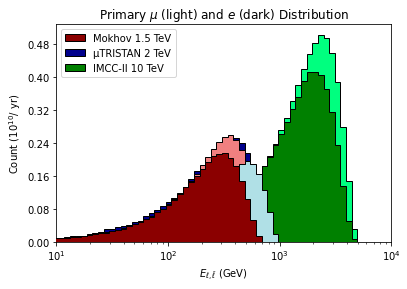

In [76]:
import matplotlib.ticker as ticker
bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
plt.hist(es_mokhov['E'], weights = es_mokhov['w']/1e10, bins = bins, histtype = 'stepfilled', label = 'Mokhov 1.5 TeV', color = 'darkred', zorder = 15, edgecolor = 'black')
plt.hist(mus_mokhov['E'], weights = mus_mokhov['w']/1e10, bins = bins, histtype = 'stepfilled', color = 'lightcoral', zorder = 10, edgecolor = 'black')

plt.hist(es_muT['E'], weights = es_muT['w']/1e10, bins = bins, histtype = 'stepfilled', label = 'μTRISTAN 2 TeV', color = 'darkblue', zorder = 9, edgecolor = 'black')
plt.hist(mus_muT['E'], weights = mus_muT['w']/1e10, bins = bins, histtype = 'stepfilled', color = 'powderblue', zorder = 10, edgecolor = 'black')

plt.hist(es_mucol['E'], weights = es_mucol['w']/1e10, bins = bins, histtype = 'stepfilled', label = 'IMCC-II 10 TeV', color = 'green', zorder = 2, edgecolor = 'black')
plt.hist(mus_mucol['E'], weights = mus_mucol['w']/1e10, bins = bins, histtype = 'stepfilled', color = 'springgreen', zorder = 1, edgecolor = 'black')

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2))  # Adjust the interval as needed
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.08))

plt.xlabel(r'$E_{\ell,\bar{\ell}}$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.xscale('log')
plt.xlim(10,10**4)
plt.title(r'Primary $\mu$ (light) and $e$ (dark) Distribution')
plt.legend(loc = 'upper left')

In [17]:
dfs = [mus_mucol, es_mucol, mus_mokhov, es_mokhov, mus_muT, es_muT]
theta = [None, None, None, None, None, None]

for i,el in enumerate(dfs):
    theta[i] = np.arccos(el['pz'] / np.sqrt(el['px']**2 + el['py']**2 + el['pz']**2)) * 180/np.pi

Text(0.5, 1.0, 'Primary Lepton Ejection Angle from Neutrino Interactions')

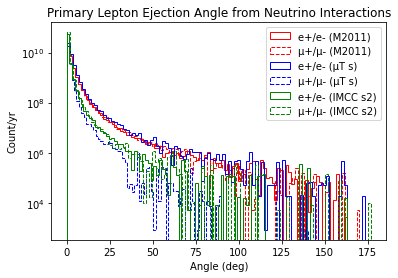

In [13]:
plt.hist(theta[3], weights = es_mokhov['w'], bins = 100, histtype = 'step', label = 'e+/e- (M2011)', color = 'red')
plt.hist(theta[2], weights = mus_mokhov['w'], bins = 100, histtype = 'step', label = 'μ+/μ- (M2011)', linestyle = '--', color = 'red')

plt.hist(theta[5], weights = es_muT['w'], bins =100, histtype = 'step', label = 'e+/e- (μT s)', color = 'blue')
plt.hist(theta[4], weights = mus_muT['w'], bins = 100, histtype = 'step', label = 'μ+/μ- (μT s)', linestyle = '--', color = 'blue')

plt.hist(theta[1], weights = es_mucol['w'], bins = 100, histtype = 'step', label = 'e+/e- (IMCC s2)', color = 'green')
plt.hist(theta[0], weights = mus_mucol['w'], bins = 100, histtype = 'step', label = 'μ+/μ- (IMCC s2)', linestyle = '--', color = 'green')

plt.xlabel('Angle (deg)')
plt.ylabel('Count/yr')
plt.legend(loc = 'upper right')
plt.yscale('log')
plt.title('Primary Lepton Ejection Angle from Neutrino Interactions')

Text(0.5, 1.0, 'Primary Lepton Ejection Angle from Neutrino Interactions')

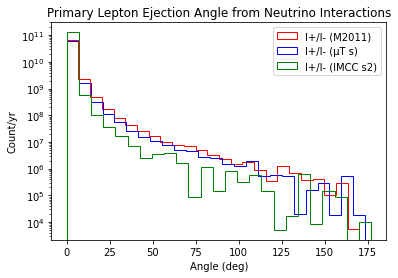

In [14]:
plt.hist(pd.concat([theta[3],theta[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0), bins = 25, histtype = 'step', label = 'l+/l- (M2011)', color = 'red')

plt.hist(pd.concat([theta[5],theta[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0), bins = 25, histtype = 'step', label = 'l+/l- (μT s)', color = 'blue')

plt.hist(pd.concat([theta[1],theta[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0), bins = 25, histtype = 'step', label = 'l+/l- (IMCC s2)', color = 'green')

plt.xlabel('Angle (deg)')
plt.ylabel('Count/yr')
plt.legend(loc = 'upper right')
plt.yscale('log')
plt.title('Primary Lepton Ejection Angle from Neutrino Interactions')

In [18]:
dfs = [mus_mucol, es_mucol, mus_mokhov, es_mokhov, mus_muT, es_muT]
pT = [None, None, None, None, None, None]

for i,el in enumerate(dfs):
    pT[i] = np.sqrt(el['py']**2 + el['px']**2)

Text(0.5, 1.0, 'Primary Lepton pT from Neutrino Interactions')

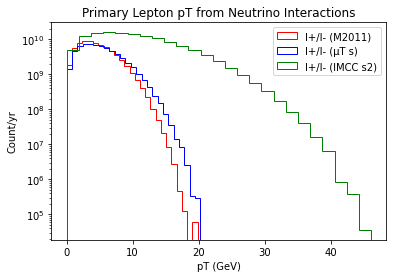

In [16]:
plt.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0), bins = 25, histtype = 'step', label = 'l+/l- (M2011)', color = 'red')

plt.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0), bins = 25, histtype = 'step', label = 'l+/l- (μT s)', color = 'blue')

plt.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0), bins = 25, histtype = 'step', label = 'l+/l- (IMCC s2)', color = 'green')

plt.xlabel('pT (GeV)')
plt.ylabel('Count/yr')
plt.legend(loc = 'upper right')
plt.yscale('log')
plt.title('Primary Lepton pT from Neutrino Interactions')

### NU plots

In [9]:
sim = dg.SimulateDetector(param = 'mokhov', N_evals = 1e5)
sd = sim.run(collision = 'mu+mu-', Lss = 50)

Succesfully simulated decays:
Mohkov et al. (Fermilab) parameter set with 1.000e+07 evaluations .
1.863e+07 MC generations; took 3.74e+02 s.
Successfully simulated neutrino event rates within Det v2:
Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m.
Total count: 8.91e+10 events; took 3.15e+02 s.



In [13]:
gc.collect()
sim = dg.SimulateDetector(param = 'mutristan s', N_evals = 1e5)
sd2 = sim.run(collision = 'mu+e-', Lss = 75)

Succesfully simulated decays:
μTRISTAN (s) parameter set with 1.000e+07 evaluations .
1.863e+07 MC generations; took 3.67e+02 s.
Successfully simulated neutrino event rates within Det v2:
μTRISTAN (s) (μ+e-) at L = 75.00 m.
Total count: 8.35e+10 events; took 1.55e+02 s.



In [14]:
del sim
gc.collect()
sim = dg.SimulateDetector(param = 'mucol s2', N_evals = 1e5)
sd3 = sim.run(collision = 'mu+mu-', Lss = 100)

Succesfully simulated decays:
MuCoL (s2) parameter set with 1.000e+07 evaluations .
1.863e+07 MC generations; took 3.71e+02 s.
Successfully simulated neutrino event rates within Det v2:
MuCoL (s2) (μ+μ-) at L = 100.00 m.
Total count: 1.69e+11 events; took 2.77e+02 s.



Text(0.5, 1.0, 'Geometrical Angle wrt z-Axis of Neutrino Interactions')

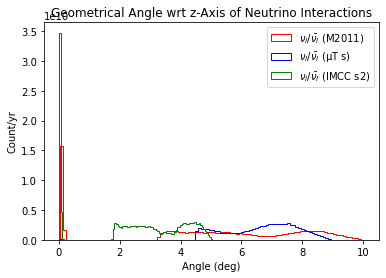

In [38]:
# angles
_,_,_,w_mokhov,_,E_mokhov,cost_mokhov = sd.get_data()
_,_,_,w_muTs,_,E_muTs,cost_muTs = sd2.get_data()
_,_,_,w_mucol,_,E_mucol,cost_mucol = sd3.get_data()

plt.hist(np.arccos(cost_mokhov) * 180/np.pi, weights=w_mokhov, bins = 100, histtype = 'step', label = r'$\nu_l$/$\bar{\nu_l}$ (M2011)', color = 'red')

plt.hist(np.arccos(cost_muTs)* 180/np.pi, weights=w_muTs, bins = 100, histtype = 'step', label = r'$\nu_l$/$\bar{\nu_l}$ (μT s)', color = 'blue')

plt.hist(np.arccos(cost_mucol)* 180/np.pi, weights=w_mucol, bins = 100, histtype = 'step', label = r'$\nu_l$/$\bar{\nu_l}$ (IMCC s2)', color = 'green')

plt.xlabel('Angle (deg)')
plt.ylabel('Count/yr')
plt.legend(loc = 'upper right')
plt.title('Geometrical Angle wrt z-Axis of Neutrino Interactions')

In [37]:
np.sum(w_mokhov)

89147302112.09499

In [ ]:
with open('gen_data/muTs.pkl', 'wb') as file:
    pickle.dump(sd2, file)

In [41]:
with open('gen_data/mokhov.pkl', 'wb') as file:
    pickle.dump(sd, file)

In [42]:
with open('gen_data/mucols2.pkl', 'wb') as file:
    pickle.dump(sd3, file)

In [85]:
with open('gen_data/muTs.pkl', 'rb') as file:
    muTs = pickle.load(file)
with open('gen_data/mucols2.pkl', 'rb') as file:
    mucol = pickle.load(file)
with open('gen_data/mokhov.pkl', 'rb') as file:
    mokhov = pickle.load(file)

In [86]:
_,_,_,w_muTs,times_muTs,E_muTs,cost_muTs = muTs.get_data()
_,_,_,w_mucol,times_mucol,E_mucol,cost_mucol = mucol.get_data()
_,_,_,w_mokhov,times_mokhov,E_mokhov,cost_mokhov = mokhov.get_data()

## pT

In [87]:
pT_muTs = E_muTs * np.sqrt(1 - cost_muTs**2)
pT_mokhov = E_mokhov * np.sqrt(1 - cost_mokhov**2)
pT_mucol = E_mucol * np.sqrt(1 - cost_mucol**2)

Text(0.5, 1.0, 'Primary Lepton $p_T$: Geometrical vs Interaction Contributions')

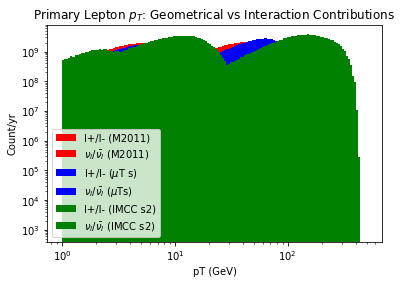

In [13]:
bins = np.logspace(0, 2.7, 150)
plt.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0), bins = bins, histtype = 'stepfilled', label = 'l+/l- (M2011)', color = 'red')
plt.hist(pT_mokhov, weights = w_mokhov, bins = bins, histtype = 'stepfilled', label = r'$\nu_l$/$\bar{\nu_l}$ (M2011)', linestyle = '--', color = 'red')
plt.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0), bins = bins, histtype = 'stepfilled', label = r'l+/l- ($\mu$T s)', color = 'blue')
plt.hist(pT_muTs, weights = w_muTs, bins = bins, histtype = 'stepfilled', label = r'$\nu_l$/$\bar{\nu_l}$ ($\mu$Ts)', linestyle = '--', color = 'blue')
plt.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0), bins = bins, histtype = 'stepfilled', label = 'l+/l- (IMCC s2)', color = 'green')
plt.hist(pT_mucol, weights = w_mucol, bins = bins, histtype = 'stepfilled', label = r'$\nu_l$/$\bar{\nu_l}$ (IMCC s2)', linestyle = '--', color = 'green')

plt.xlabel('pT (GeV)')
plt.ylabel('Count/yr')
plt.legend(loc = 'lower left')
plt.yscale('log')
plt.xscale('log')
plt.title(r'Primary Lepton $p_T$: Geometrical vs Interaction Contributions')

Text(0.5, 1.0, 'Interaction (light) vs Geometrical (dark) Contributions')

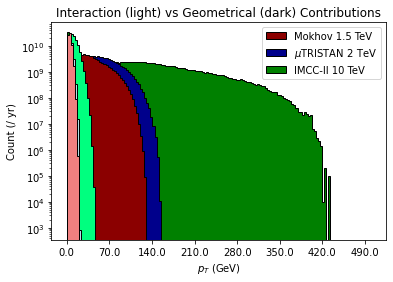

In [74]:
bins = np.linspace(0, 500, 150)
plt.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0), bins = bins, histtype = 'stepfilled', color = 'lightcoral', zorder = 10, edgecolor = 'black')
plt.hist(pT_mokhov, weights = w_mokhov, bins = bins, histtype = 'stepfilled', label = 'Mokhov 1.5 TeV', color = 'darkred', zorder = 3, edgecolor = 'black')
plt.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0), bins = bins, histtype = 'stepfilled', color = 'powderblue', zorder = 9, edgecolor = 'black')
plt.hist(pT_muTs, weights = w_muTs, bins = bins, histtype = 'stepfilled', label = r'$\mu$TRISTAN 2 TeV', color = 'darkblue', zorder = 2, edgecolor = 'black')
plt.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0), bins = bins, histtype = 'stepfilled',  color = 'springgreen', zorder = 8, edgecolor = 'black')
plt.hist(pT_mucol, weights = w_mucol, bins = bins, histtype = 'stepfilled', label = 'IMCC-II 10 TeV', color = 'green', zorder = 1, edgecolor = 'black')

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(70))  # Adjust the interval as needed
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.08))

plt.xlabel(r'$p_T$ (GeV)')
plt.ylabel('Count (/ yr)')
plt.legend(loc = 'upper right')
plt.yscale('log')
#plt.xscale('log')
plt.title(r'Interaction (light) vs Geometrical (dark) Contributions')

## E

Text(0.5, 1.0, '$\\nu$ Interaction Energies')

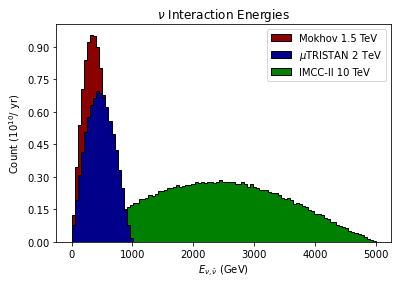

In [40]:
bins = np.linspace(0,5e3, 100)
plt.hist(E_mokhov, weights  = w_mokhov/1e10, histtype = 'stepfilled', color = 'darkred', label = r'Mokhov 1.5 TeV', bins = bins, zorder = 2, edgecolor = 'black')
plt.hist(E_muTs, weights  = w_muTs/1e10, histtype = 'stepfilled', color = 'darkblue', label = r'$\mu$TRISTAN 2 TeV', bins = bins, zorder = 3, edgecolor = 'black')
plt.hist(E_mucol, weights  = w_mucol/1e10, histtype = 'stepfilled', color = 'green', label = r'IMCC-II 10 TeV', bins = bins, zorder = 1, edgecolor = 'black')

#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(70))  # Adjust the interval as needed
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.15))

plt.xlabel(r'$E_{\nu, \bar{\nu}}$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.legend(loc = 'upper right')
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'$\nu$ Interaction Energies')

## Timing

(array([1.90343369e+10, 1.75135553e+10, 1.55190230e+10, 1.68552356e+10,
        1.57342942e+10, 1.65696834e+10, 1.59078838e+10, 1.64141878e+10,
        1.83624599e+10, 1.75596145e+10]),
 array([-1.88055979e-08, -1.49425158e-08, -1.10794336e-08, -7.21635152e-09,
        -3.35326939e-09,  5.09812735e-10,  4.37289486e-09,  8.23597699e-09,
         1.20990591e-08,  1.59621412e-08,  1.98252234e-08]),
 <BarContainer object of 10 artists>)

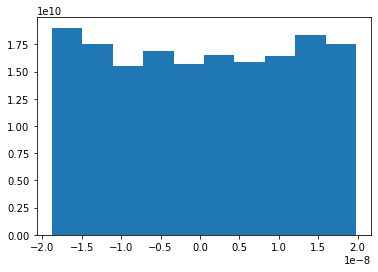

In [17]:
plt.hist(times_mucol, weights = w_mucol)

In [103]:
_, _, _, wms, timesms, _, _ = mucol.get_data(sec = 'muon_detector')

In [104]:
_, _, _, wno, timesno, _, _ = mucol.get_data(sec = 'nozzles')
_, _, _, whc, timeshc, _, _ = mucol.get_data(sec = 'hcal')
_, _, _, wec, timesec, _, _ = mucol.get_data(sec = 'ecal')

Text(0.5, 1.0, 'Event Timing wrt Bunch Crossing (IMCC-II)')

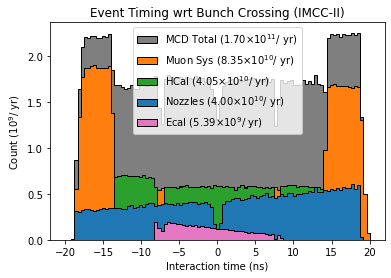

In [106]:
bins = np.linspace(-20, 20, 100)
data = [timesms*1e9, timeshc*1e9, timesno*1e9, timesec*1e9]
weights = [wms/1e9, whc/1e9, wno/1e9, wec/1e9]
plt.hist(times_mucol*1e9, weights = w_mucol/1e9, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = 'tab:gray', label = r'MCD Total (1.70$\times10^{11}$/ yr)', stacked = True)
plt.hist(timesms*1e9, weights = wms/1e9, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = 'tab:orange', label = r'Muon Sys (8.35$\times10^{10}$/ yr)', stacked = True)
plt.hist(timeshc*1e9, weights = whc/1e9, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = 'tab:green', label = r'HCal (4.05$\times10^{10}$/ yr)', stacked = True)
plt.hist(timesno*1e9, weights = wno/1e9, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = 'tab:blue', label = r'Nozzles (4.00$\times10^{10}$/ yr)', stacked = True)
plt.hist(timesec*1e9, weights = wec/1e9, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = 'tab:pink', label = r'Ecal (5.39$\times10^{9}$/ yr)', stacked = True)
plt.legend(loc = 'upper center')
plt.ylabel(r'Count ($10^{9}$/ yr)')
plt.xlabel('Interaction time (ns)')
plt.title('Event Timing wrt Bunch Crossing (IMCC-II)')

Text(0.5, 1.0, 'Event Timing wrt Bunch Crossing (IMCC-II)')

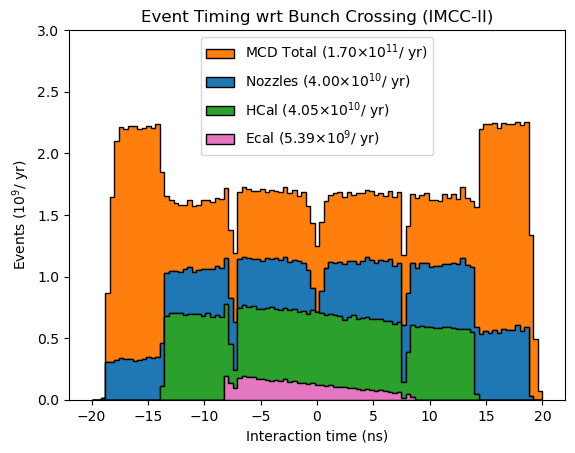

In [139]:
bins = np.linspace(-20, 20, 100)
data = [timesms*1e9, timeshc*1e9, timesno*1e9, timesec*1e9]
weights = [wms/1e9, whc/1e9, wno/1e9, wec/1e9]
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:pink']
labels = [r'MCD Total (1.70$\times10^{11}$/ yr)', r'HCal (4.05$\times10^{10}$/ yr)', r'Nozzles (4.00$\times10^{10}$/ yr)', r'Ecal (5.39$\times10^{9}$/ yr)']

order = [3,1,2,0]
data = [data[order[0]], data[order[1]], data[order[2]], data[order[3]]]
weights = [weights[order[0]], weights[order[1]], weights[order[2]], weights[order[3]]]
colors = [colors[order[0]], colors[order[1]], colors[order[2]], colors[order[3]]]
labels = [labels[order[0]], labels[order[1]], labels[order[2]], labels[order[3]]]

plt.hist(data, weights = weights, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = colors, label = labels, stacked = True)

plt.legend(loc = 'upper center')
plt.ylabel(r'Events ($10^{9}$/ yr)')
plt.xlabel('Interaction time (ns)')
plt.ylim(0,3)
plt.title(r'Event Timing wrt Bunch Crossing (IMCC-II)')

In [140]:
import matplotlib.font_manager as fm

fm._rebuild()

In [115]:
fig, ax = plt.std_fig(figsize=(5, 4))

AttributeError: module 'matplotlib.pyplot' has no attribute 'std_fig'

## Event distr

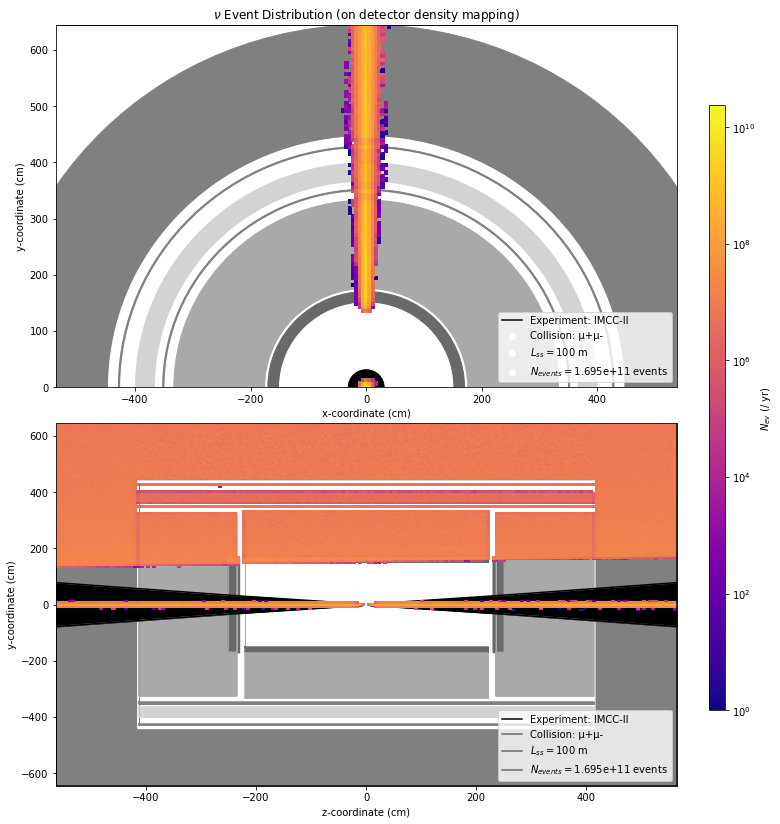

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(2, 1, figsize = (11,14))
hist1 = mucol.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, cmin = None)
hist2 = mucol.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, cmin = None)

vmin=1
vmax=max(hist1[0].max(), hist2[0].max())

axs[0].clear()
axs[1].clear()
hist1 = mucol.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, vmin = vmin, vmax = vmax, cmin = 1, title = False)
hist2 = mucol.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, vmin = vmin, vmax = vmax, cmin = 1)

# Add a colorbar that spans both subplots
axs[0].set_title(r'$\nu$ Event Distribution (on detector density mapping)')
cbar_ax = fig.add_subplot(111)  # Create a new subplot for the colorbar
cbar = fig.colorbar(hist1[3], ax=[axs[0], axs[1]], cax=cbar_ax)  # Create the colorbar
plt.subplots_adjust(hspace=0.1)
cbar.set_label(r'$N_{ev}$ (/ yr)')
# Adjust the position of the colorbar to span both subplots
fig.subplots_adjust(right=0.909090909)  # Adjust the right side to make space for the colorbar
cbar_ax.set_position([0.95, 0.2, 0.02, 0.6])  # [left, bottom, width, height]

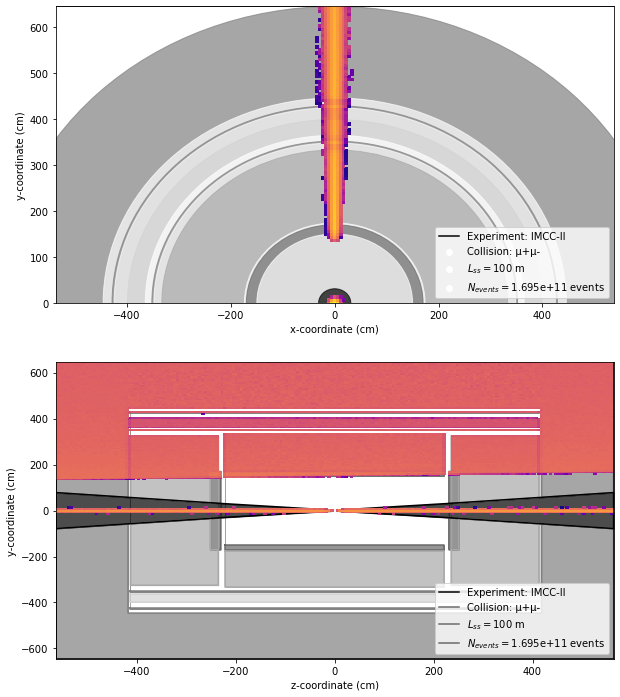

In [168]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(2, 1, figsize = (10,12))
hist1 = mucol.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, cmin = None)
hist2 = mucol.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, cmin = None)

vmin=100
vmax=max(hist1[0].max(), hist2[0].max())

axs[0].clear()
axs[1].clear()
hist1 = mucol.plot(cmap = 'plasma', orientation = 'x-y', fs = None, ax = axs[0], colorbar = 0, h = True, vmin = vmin, vmax = vmax, cmin = 100, title = False)
hist2 = mucol.plot(cmap = 'plasma', orientation = 'z-y', fs = None, ax = axs[1], colorbar = 0, h = True, title = 0, vmin = vmin, vmax = vmax, cmin = 100)

# Add a colorbar that spans both subplots
#cbar_ax = fig.add_subplot(111, label='colorbar_ax')  # Create a new subplot for the colorbar
#cbar = fig.colorbar(hist1[3], ax=[axs[0], axs[1]], cax=cbar_ax)  # Create the colorbar

# Adjust the position of the colorbar to span both subplots
#fig.subplots_adjust(right=0.95)  # Adjust the right side to make space for the colorbar
#cbar_ax.set_position([0.975, 0.2, 0.01, 0.6])  # [left, bottom, width, height]


## Explorable Energy Ranges

In [102]:
_,_,_,w_muTs,times_muTs,E_muTs,cost_muTs = muTs.get_data()
_,_,_,w_mucol,times_mucol,E_mucol,cost_mucol = mucol.get_data()
_,_,_,w_mokhov,times_mokhov,E_mokhov,cost_mokhov = mokhov.get_data()

wm_muTs = np.average(E_muTs, weights  = w_muTs)
wsd_muTs=  np.sqrt(np.average((E_muTs - wm_muTs)**2, weights = w_muTs))
wm_mokhov = np.average(E_mokhov, weights  = w_mokhov)
wsd_mokhov=  np.sqrt(np.average((E_mokhov - wm_mokhov)**2, weights = w_mokhov))
wm_mucol = np.average(E_mucol, weights  = w_mucol)
wsd_mucol=  np.sqrt(np.average((E_mucol - wm_mucol)**2, weights = w_mucol))

In [95]:
print(wm_mucol, wsd_mucol)

2551.607664851049 1092.2398088986174


In [97]:
print(wm_mucol, wsd_mucol)

2568.551747348973 1088.799616440465


(10, 100000)

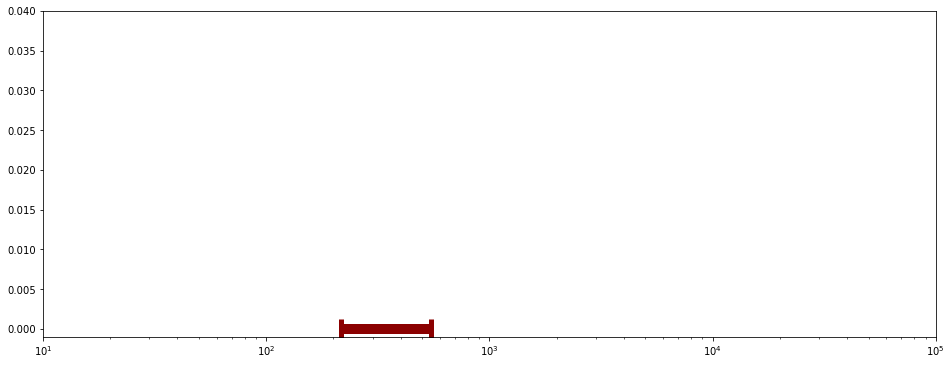

In [101]:
plt.figure(figsize = (16,6))
plt.errorbar([wm_mokhov], [0], xerr = [wsd_mokhov], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkred', linewidth = 10)
#plt.errorbar([wm_muTs], [0], xerr = [wsd_muTs], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkblue', linewidth = 10)
#plt.errorbar([wm_mucol], [0], xerr = [wsd_mucol], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'green', linewidth = 10)

plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

## Sds of neutrino event counts

In [22]:
#so far, muTRISTAN: 2.5%, mokhov: 2.2%, mucol: 4.4%

#usual procedure...
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd
import gc
import pickle
#total_count = []
#i = 0
#while i < 1000:
#    sim = dg.SimulateDetector(param = 'mucol s2', N_evals = 1e5)
#    sd2 = sim.run(collision = 'mu+mu-', Lss = 100)
#    total_count.append(sd2.tc)
#    i+=1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


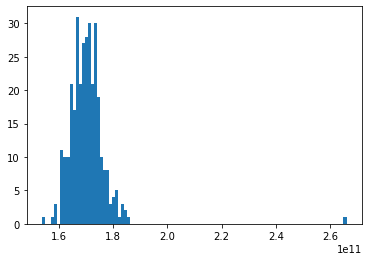

In [23]:
plt.hist(total_count, bins = 100)
plt.show()

In [31]:
#while i < 1000:
#    sim = dg.SimulateDetector(param = 'mutristan s', N_evals = 1e5)
#    sd2 = sim.run(collision = 'mu+e-', Lss = 75)
#    total_count.append(sd2.tc)
#    i+=1

In [24]:
np.average(total_count)

170346859450.6336

In [27]:
np.std(total_count)/np.average(total_count)

0.043620212970762705

In [26]:
print(f'{np.std(total_count):.3e}')

7.431e+09


In [25]:
print(f'{np.average(total_count):.3e}')

1.703e+11


In [2]:
total_count

NameError: name 'total_count' is not defined

In [28]:
len(total_count)

327

In [10]:
i

229

In [50]:
sim = dg.SimulateDetector(param = 'mutristan s', N_evals = 1e6)
sd1 = sim.run(collision = 'mu+mu+', Lss = 75)

Succesfully simulated decays:
μTRISTAN (s) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 34.0 s.
Successfully simulated neutrino event rates within Det v2:
μTRISTAN (s) (μ+μ+) at L = 75.00 m.
Total count: 8.45e+10 events; took 24.4 s.



In [52]:
sim = dg.SimulateDetector(param = 'mokhov', N_evals = 1e6)
sd = sim.run(collision = 'mu+mu-', Lss = 50)

Succesfully simulated decays:
Mohkov et al. (Fermilab) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 34.0 s.
Successfully simulated neutrino event rates within Det v2:
Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m.
Total count: 8.84e+10 events; took 25.8 s.



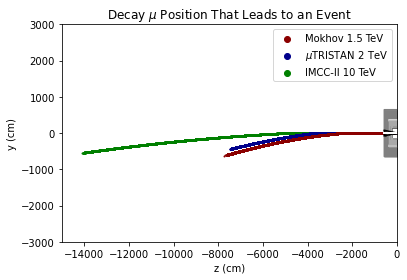

In [81]:
fig, ax = plt.subplots()
ax.scatter((sd2.sims[0]).dec_pos[:,:,2], (sd2.sims[0]).dec_pos[:,:,1], s = 1, color = 'green')
ax.scatter((sd1.sims[0]).dec_pos[:,:,2], (sd1.sims[0]).dec_pos[:,:,1], s = 1,  color = 'darkblue')
ax.scatter((sd.sims[0]).dec_pos[:,:,2], (sd.sims[0]).dec_pos[:,:,1], s = 1, color = 'darkred')
ax.scatter(1000,1000, color = 'darkred', label = r'Mokhov 1.5 TeV')
ax.scatter(1000,1000, color = 'darkblue', label = r'$\mu$TRISTAN 2 TeV')
ax.scatter(1000,1000, color = 'green', label = r'IMCC-II 10 TeV')
dg.plot_det('det_v2', ax = ax)
plt.ylim(-3000,3000)
plt.xlim(-15000, 0)
plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.legend()
plt.title(r'Decay $\mu$ Position That Leads to an Event')
plt.show()

In [73]:
plt.hist(E_mokhov, weights  = w_mokhov/1e10, histtype = 'stepfilled', color = 'darkred', label = r'Mokhov 1.5 TeV', bins = bins, zorder = 2, edgecolor = 'black')
plt.hist(E_muTs, weights  = w_muTs/1e10, histtype = 'stepfilled', color = 'darkblue', label = r'$\mu$TRISTAN 2 TeV', bins = bins, zorder = 3, edgecolor = 'black')
plt.hist(E_mucol, weights  = w_mucol/1e10, histtype = 'stepfilled', color = 'green', label = r'IMCC-II 10 TeV',

-7447.6862983997335